# Lesson 4 Hierarchical Clustering

Hierachical Clustering is a type of clustering that organized the data hierarchically. One of the way is to form the hierarchy from bottom up and perform merging. One of such algorithms is Agglomerative Clustering.  

## Setup
If you use the base environment of anaconda then the packages should be installed. If you get a ModuleNotFoundError, please install the packages using either

```
conda install numpy pandas scikit-learn matplotlib 
```
or (if you work in a machine without anaconda in the future)
```
pip install numpy pandas sklearn matplotlib
```

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


## Data Preparation

In [2]:
# importing the Iris dataset with pandas
dataset = pd.read_csv('Iris.csv')


In [3]:
print(dataset.head())
print(type(dataset))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>


In [4]:
ds1_4 = dataset.iloc[:, [1,2,3,4]]
print (ds1_4.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [5]:
x = dataset.iloc[:, [1,2,3,4]].values
print(type(x))
print(x[0:5,:])

<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Hierarchy

To visualize the hierarchy, we are using the linkage and dendogram function from scipy (not scikit-learn) 

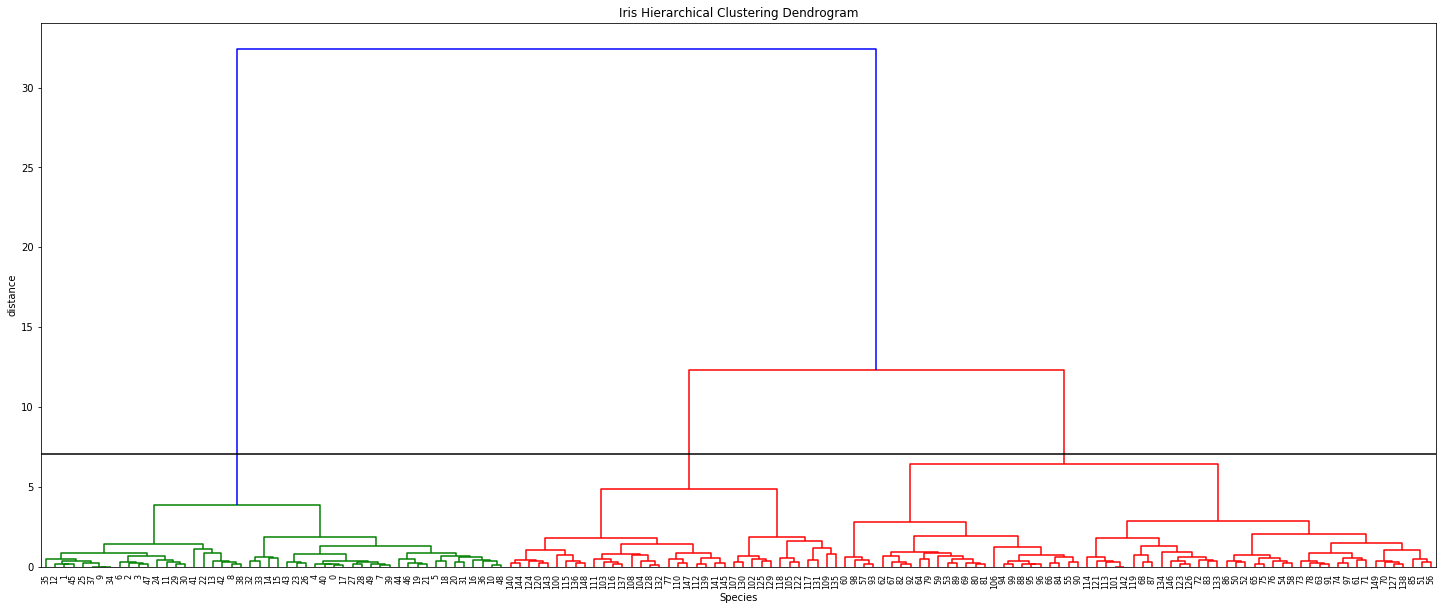

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(x, 'ward')

# set cut-off to 150 cluster merges
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

Once we have the hierarchy, we can set the max distance to generate any number of clusters that we need. 

In [7]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(x);

In [8]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
y = label_encoder.fit_transform(dataset['Species']) 
  

(150, 4)


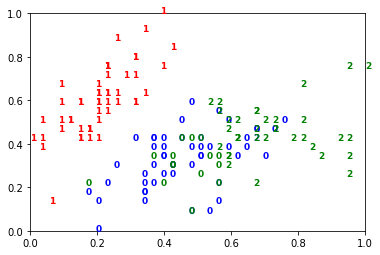

In [9]:
# MinMax scale the data so that it fits nicely onto the 0.0->1.0 axes of the plot.
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(x)
print(X_plot.shape)

colours = 'rbg'
for i in range(x.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

#plt.xticks([])
#plt.yticks([])
#plt.axis('off')
plt.show()

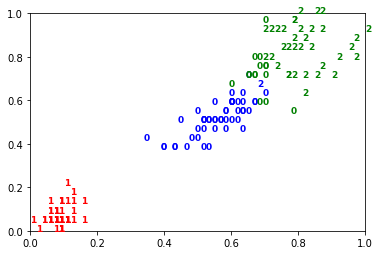

In [10]:
for i in range(x.shape[0]):
    plt.text(X_plot[i, 2], X_plot[i, 3], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

#plt.xticks([])
#plt.yticks([])
#plt.axis('off')
plt.show()